# Data Preprocessing

In [19]:
from tensorflow.python.keras.utils.np_utils import to_categorical
import numpy as np
np.random.seed(10)

from  keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label) = mnist.load_data()

使用reshape轉換 取得feature(784個float數字)    
忘記shape用途可以看: https://blog.csdn.net/u010758410/article/details/71554224  
reshape: https://steam.oxxostudio.tw/category/python/numpy/array-shape.html  
`reshape()` 可以將現有的陣列，轉換為特定維度的陣列，使用時必須注意特定維度的項目總數，要和原本的陣列相同，下方的例子會將一個一維陣列，轉換成 4x2 以及 2x4 的陣列。

In [20]:
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

## Normalize

In [21]:
x_train_normalize = x_train/255
x_test_normalize = x_test/255

## One-hot encoding
 - Label encoding:把每個類別mapping到某個整數 不會增加新欄位  
 - One hot encoding:為每個類別新增一個欄位 用0/1表示是否  
詳細看:[資料前處理( Label encoding、 One hot encoding)](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)


In [22]:
y_train_onehot = to_categorical(y_train_label)
y_test_onehot = to_categorical(y_test_label)

# Build model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(
    Dense(
        units = 256,
        input_dim = 784,
        kernel_initializer = 'normal',
        activation = 'relu'
    )
)
model.add(
    Dense(
        units = 10,
        kernel_initializer = 'normal',
        activation = 'softmax'
    )
)
model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [24]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

train_history = model.fit(
    x = x_train_normalize,
    y = y_train_onehot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 200,
    verbose = 2
)

Epoch 1/10
240/240 - 2s - 8ms/step - accuracy: 0.8836 - loss: 0.4398 - val_accuracy: 0.9395 - val_loss: 0.2200
Epoch 2/10
240/240 - 1s - 2ms/step - accuracy: 0.9450 - loss: 0.1923 - val_accuracy: 0.9553 - val_loss: 0.1602
Epoch 3/10
240/240 - 1s - 2ms/step - accuracy: 0.9610 - loss: 0.1369 - val_accuracy: 0.9647 - val_loss: 0.1289
Epoch 4/10
240/240 - 1s - 2ms/step - accuracy: 0.9701 - loss: 0.1049 - val_accuracy: 0.9682 - val_loss: 0.1143
Epoch 5/10
240/240 - 1s - 3ms/step - accuracy: 0.9769 - loss: 0.0824 - val_accuracy: 0.9702 - val_loss: 0.1001
Epoch 6/10
240/240 - 1s - 2ms/step - accuracy: 0.9808 - loss: 0.0668 - val_accuracy: 0.9701 - val_loss: 0.0961
Epoch 7/10
240/240 - 1s - 2ms/step - accuracy: 0.9845 - loss: 0.0551 - val_accuracy: 0.9745 - val_loss: 0.0860
Epoch 8/10
240/240 - 1s - 2ms/step - accuracy: 0.9873 - loss: 0.0456 - val_accuracy: 0.9740 - val_loss: 0.0848
Epoch 9/10
240/240 - 1s - 3ms/step - accuracy: 0.9902 - loss: 0.0381 - val_accuracy: 0.9744 - val_loss: 0.0826
E

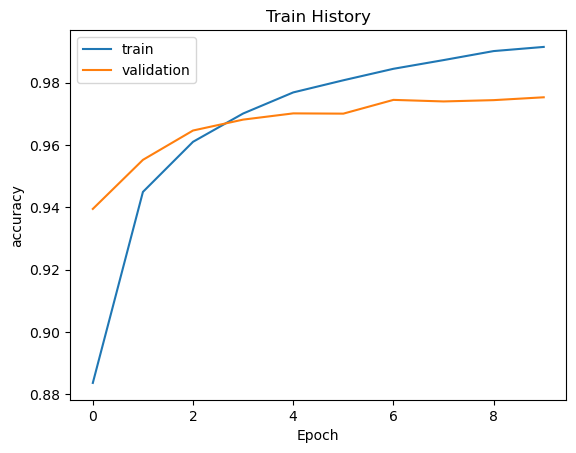

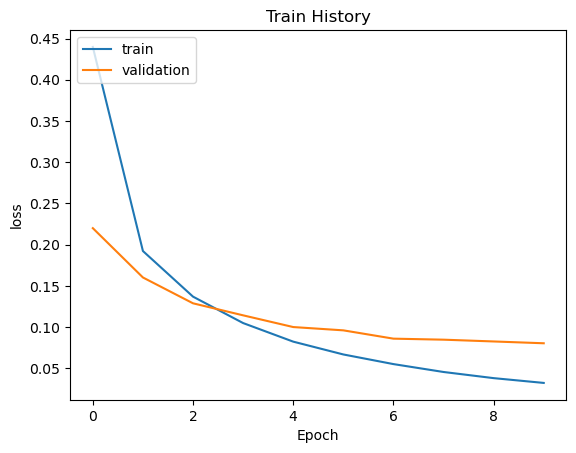

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

# Evaluation Model

In [26]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print()
print('accuracy = ', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.9735 - loss: 0.0832

accuracy =  0.9775999784469604


In [27]:
prediction = model.predict(x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

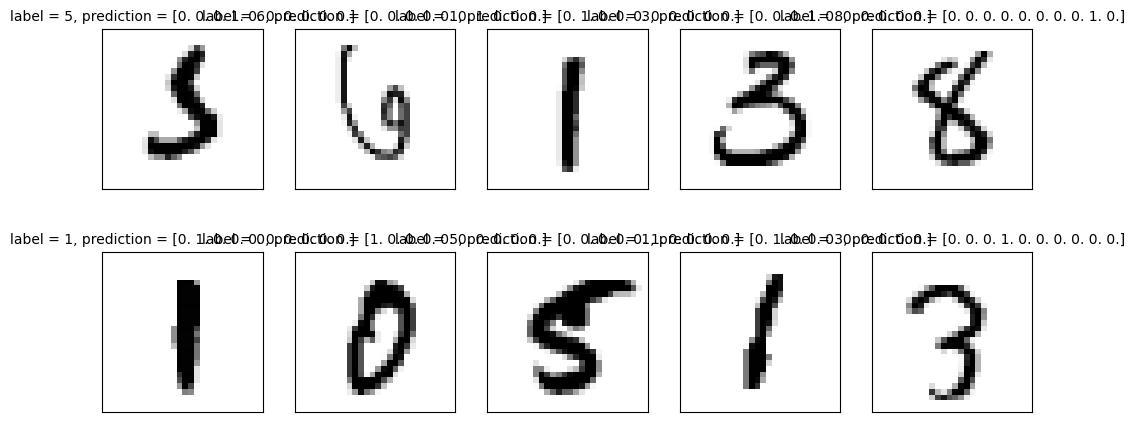

In [28]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)

    if num>25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = "label = " + str(labels[idx])
        if len(prediction)>0:
            title += ", prediction = " + str(prediction[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx = 340)

# Confusion matrix
ValueError: operands could not be broadcast together with shapes (1,10000) (10000,10)   

In [29]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

ValueError: operands could not be broadcast together with shapes (1,10000) (10000,10) 

In [30]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df[:2]

ValueError: Per-column arrays must each be 1-dimensional

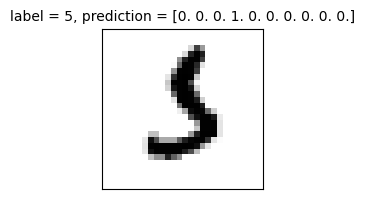

In [31]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx = 340, num=1)